In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
#specify GROMACS version and it's directory in colab
gromacs_version = "2024.1"  # Adjust as necessary
gromacs_tar_path = f"/content/drive/MyDrive/gromacs-on-colab/gromacs-{gromacs_version}.tar.gz"


In [ ]:
#extract GROMACS in working directory "/content"
extract_path = "/content"  # This is where you'll extract GROMACS to
!mkdir -p "{extract_path}"  # Create the directory if it doesn't exist
!tar -xzf "{gromacs_tar_path}" -C "{extract_path}"


In [ ]:
#find path to any file
# !find / -name dist.xvg 2>/dev/null


In [ ]:
#Install GROMACS
%%bash
source /content/gromacs-2024.1/build/scripts/GMXRC
mkdir -p /content/grojobs
cd /content/grojobs
/content/gromacs-2024.1/build/bin/gmx

export GMXLIB=/usr/local/share/gromacs/top


SYNOPSIS

gmx [-[no]h] [-[no]quiet] [-[no]version] [-[no]copyright] [-nice <int>]
    [-[no]backup]

OPTIONS

Other options:

 -[no]h                     (no)
           Print help and quit
 -[no]quiet                 (no)
           Do not print common startup info or quotes
 -[no]version               (no)
           Print extended version information and quit
 -[no]copyright             (no)
           Print copyright information on startup
 -nice   <int>              (19)
           Set the nicelevel (default depends on command)
 -[no]backup                (yes)
           Write backups if output files exist

Additional help is available on the following topics:
    commands    List of available commands
    selections  Selection syntax and usage
To access the help, use 'gmx help <topic>'.
For help on a command, use 'gmx help <command>'.


                         :-) GROMACS - gmx, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content/grojobs
Command line:
  gmx


GROMACS reminds you: "Theoretical chemistry has of course always been important and useful ... at least to theoretical chemists" (Sven Lidin)



In [ ]:
#verify installation
!/content/gromacs-2024.1/build/bin/gmx --version

                         :-) GROMACS - gmx, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx --version

GROMACS version:     2024.1
Precision:           mixed
Memory model:        64 bit
MPI library:         thread_mpi
OpenMP support:      enabled (GMX_OPENMP_MAX_THREADS = 128)
GPU support:         CUDA
NBNxM GPU setup:     super-cluster 2x2x2 / cluster 8
SIMD instructions:   AVX_512
CPU FFT library:     fftw-3.3.8-sse2-avx-avx2-avx2_128-avx512
GPU FFT library:     cuFFT
Multi-GPU FFT:       none
RDTSCP usage:        enabled
TNG support:         enabled
Hwloc support:       disabled
Tracing support:     disabled
C compiler:          /usr/bin/cc GNU 11.4.0
C compiler flags:    -fexcess-precision=fast -funroll-all-loops -mavx512f -mfma -mavx512vl -mavx512dq -mavx512bw -Wno-missing-field-initializers -O3 -DNDEBUG
C++ compiler:        /usr/bin/c++ GNU 11.4.0
C++ compiler flags:  -f

#1- Download the pdb, clean it in Autodock tools. and upload it. It's better to use the same receptor used for docking. It will be in .pdbqt format so convert it to pdb.

#2- Load Vina output in pymol. input the following command
#" PyMOL>split_states output2"
#3- output the desired pose to the desired directory in pdb format as follows
#"PyMOL>save G:\GROMACS\lig2_pose18\lig.pdb, output2_0018"
#4- open it in Avogardro. Build->add hydrogens. File-> save as -> lig.sdf

In [ ]:
#cobvert protein.pdb into GROMACS files with extention .gro
#> 6: AMBER99SB-ILDN protein, nucleic AMBER94 (Lindorff-Larsen et al., Proteins 78, 1950-58, 2010)
#1: TIP3P TIP 3-point, recommended

!/content/gromacs-2024.1/build/bin/gmx pdb2gmx -f protein.pdb -o protein_gmx.pdb -ignh -ter -missing

                     :-) GROMACS - gmx pdb2gmx, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx pdb2gmx -f protein.pdb -o protein_gmx.pdb -ignh -ter -missing

Select the Force Field:

From '/content/gromacs-2024.1/share/top':

 1: AMBER03 protein, nucleic AMBER94 (Duan et al., J. Comp. Chem. 24, 1999-2012, 2003)

 2: AMBER94 force field (Cornell et al., JACS 117, 5179-5197, 1995)

 3: AMBER96 protein, nucleic AMBER94 (Kollman et al., Acc. Chem. Res. 29, 461-469, 1996)

 4: AMBER99 protein, nucleic AMBER94 (Wang et al., J. Comp. Chem. 21, 1049-1074, 2000)

 5: AMBER99SB protein, nucleic AMBER94 (Hornak et al., Proteins 65, 712-725, 2006)

 6: AMBER99SB-ILDN protein, nucleic AMBER94 (Lindorff-Larsen et al., Proteins 78, 1950-58, 2010)

 7: AMBERGS force field (Garcia & Sanbonmatsu, PNAS 99, 2782-2787, 2002)

 8: CHARMM27 all-atom force field (CHARM22 plus CMAP for proteins)

 9:

#Create Conda Environment from offtk-docker-thin.yml. Environment name and dependencies are in the file

In [ ]:
import os
os.environ.pop('PYTHONPATH', None)


'/env/python'

In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O /tmp/miniconda.sh
!bash /tmp/miniconda.sh -bfp /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')


--2024-04-11 10:38:14--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144041912 (137M) [application/octet-stream]
Saving to: ‘/tmp/miniconda.sh’

/tmp/miniconda.sh   100%[===================>] 137.37M   219MB/s    in 0.6s    

2024-04-11 10:38:14 (219 MB/s) - ‘/tmp/miniconda.sh’ saved [144041912/144041912]

PREFIX=/usr/local
Unpacking payload ...
                                                                           
Installing base environment...





Preparing transaction: done
Executing transaction: done
installation finished.


In [ ]:
!conda update -n base -c defaults conda -y
!conda env create -f /content/offtk-docker-thin.yml

Channels:
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    archspec-0.2.3             |     pyhd3eb1b0_0          47 KB
    ca-certificates-2024.3.11  |       h06a4308_0         127 KB
    conda-24.3.0               |  py312h06a4308_0         1.2 MB
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following packages will be UPDATED:

  archspec                               0.2.1-pyhd3eb1b0_0 --> 0.2.3-pyhd3eb1b0_0 
  ca-certificates                     2023.12.12-h06a4308_0 --> 2024.3.11-h06a4308_0 
  conda                              24.1.2-py312h06a4308_0 --> 24.3.0-py312h06a4308_0 



conda-24.3.0         | 1.2 MB    | :   0% 0/1 [00:00<?, ?it/s]
ca

In [ ]:
#You need to install alive_progress or you will get an error while trying to run the code
!conda run -n offtk-docker-thin --no-capture-output pip install alive_progress

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 5.5 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210078 sha256=8e6e1eb8f4e69607763a70ef38d14ade3ac0e4a01bd159ccfe350a597a0415cc
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


In [ ]:
#This command will run the script using your sdf ligand file and will output mol.gro и lig.top. But first, open the script and on the last line in the following commented out block of code,
#change lig.sdf to your sdf file name
# if __name__ == '__main__':
#     save_to_GROMACS('lig.sdf', 'save1')
!conda run -n offtk-docker-thin python convert.py lig.sdf



                |                                        | - 0/1 [0%] 0s ~0s 
lig             |                                        | \ 0/1 [0%] 0s ~0s 
lig             |                                        | | 0/1 [0%] 0s ~0s 
lig             |                                        | / 0/1 [0%] 0s ~0s 
lig             |                                        | - 0/1 [0%] 0s ~0s 
lig             |                                        | \ 0/1 [0%] 1s ~0s 
lig             |                                        | | 0/1 [0%] 1s ~0s 
lig             |                                        | / 0/1 [0%] 1s ~0s 
lig             |                                        | - 0/1 [0%] 1s ~0s 
lig             |                                        | \ 0/1 [0%] 1s ~0s 
lig             |                                        | | 0/1 [0%] 1s ~0s 
lig             |                                        | / 0/1 [0%] 1s ~0s 
lig             |                                        | - 0/

In [ ]:
#create an index with the ligand's Heavy atoms. when prompted > 0 & ! a H* > name 3 LIG-H > q

!/content/gromacs-2024.1/build/bin/gmx make_ndx -f mol.gro -o index_lig.ndx

                     :-) GROMACS - gmx make_ndx, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx make_ndx -f mol.gro -o index_lig.ndx


Reading structure file
Going to read 0 old index file(s)
Analysing residue names:
There are:     1      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...

  0 System              :    45 atoms
  1 Other               :    45 atoms
  2 lig1                :    45 atoms

 nr : group      '!': not  'name' nr name   'splitch' nr    Enter: list groups
 'a': atom       '&': and  'del' nr         'splitres' nr   'l': list residues
 't': atom type  '|': or   'keep' nr        'splitat' nr    'h': help
 'r': residue              'res' nr         'chain' char
 "name": group             'case': case sensitive           'q': save and quit
 'ri': residue index

> 0 & ! a H*

Copied index group 0 'System'


In [ ]:
#create a position restraint file for the ligand  > 3: 'LIG-H'
!/content/gromacs-2024.1/build/bin/gmx genrestr -f mol.gro -n index_lig.ndx -o posre_lig.itp -fc 1000 1000 1000

                     :-) GROMACS - gmx genrestr, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx genrestr -f mol.gro -n index_lig.ndx -o posre_lig.itp -fc 1000 1000 1000


Reading structure file
Select group to position restrain
Group     0 (         System) has    45 elements
Group     1 (          Other) has    45 elements
Group     2 (           lig1) has    45 elements
Group     3 (          LIG-H) has    26 elements
Select a group: 3
Selected 3: 'LIG-H'

GROMACS reminds you: "BioBeat is Not Available In Regular Shops" (P.J. Meulenhoff)



In [ ]:
# you can find example .md files optimized for Amber via this link  https://drive.google.com/drive/folders/1LpLCPO7oS6nhBDRDMKuTmHpdTBM7v0lk?usp=sharing
#create empty files for the following steps
!touch lig.ff.itp lig.itp complex.pdb

In [ ]:
# create a GROMACS pdb file for the ligand to build the complex later
!/content/gromacs-2024.1/build/bin/gmx editconf -f mol.gro -o lig.pdb

                     :-) GROMACS - gmx editconf, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx editconf -f mol.gro -o lig.pdb

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 45 atoms
Volume: 125 nm^3, corresponds to roughly 56200 electrons
No velocities found

GROMACS reminds you: "Everything is theoretically impossible, until it is done." (Robert Heinlein)



#TO buid the complex, you need to insert the protein_gmx.pdb first into the complex.pdb file, remove the END keyword at the end (leave TER), and after TER, insert everything under the REMARK line in the lig.pdb obtained by the command above.


<h1>From the lig.top file, take the [ atomtypes ] block and insert it into lig.ff.itp<h1\>
<h1>To generate lig.itp, you need the following blocks from lig.top:
[ moleculetype ]
[ atoms ]
[ pairs ]
[ bonds ]
[ angles ]
[ dihedrals ]<h1\>

# In topol.top At the beginning of the file, after the ; Include forcefield parameters block, insert:

##; Include ligand ff
## #include "lig.ff.itp"



#At the end of the file, after the ; Include Position restraint file block, enter:

##; Include ligand topology
## #include "lig.itp"
##; Include Position restraint file
## #ifdef POSRES
## #include "posre_lig.itp"
## #endif

#And also in the [ molecules ] block, add:
## lig1 1



#Define the box and solvate


In [ ]:
!/content/gromacs-2024.1/build/bin/gmx editconf -f complex.pdb -o complex_box.pdb -bt dodecahedron -d 1.0

                     :-) GROMACS - gmx editconf, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx editconf -f complex.pdb -o complex_box.pdb -bt dodecahedron -d 1.0

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5078 atoms
Volume: 125 nm^3, corresponds to roughly 56200 electrons
No velocities found
    system size :  5.962  4.892  6.434 (nm)
    diameter    :  7.227               (nm)
    center      : -3.380  3.102  0.221 (nm)
    box vectors :  5.000  5.000  5.000 (nm)
    box angles  :  90.00  90.00  90.00 (degrees)
    box volume  : 125.00               (nm^3)
    shift       : 10.301  3.819  3.041 (nm)
new center      :  6.920  6.920  3.262 (nm)
new box vectors :  9.227  9.227  9.227 (nm)
new box angles  :  60.00  60.00  90.00 (degrees)
new box volume  : 555.49               (nm^3)

GROMACS reminds you: "How wonderful th

In [ ]:
!/content/gromacs-2024.1/build/bin/gmx solvate -cp complex_box.pdb -cs spc216.gro -p topol.top -o solv.pdb

                     :-) GROMACS - gmx solvate, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx solvate -cp complex_box.pdb -cs spc216.gro -p topol.top -o solv.pdb

Reading solute configuration
Reading solvent configuration

Initialising inter-atomic distances...

         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary. Note, that this functionality may
         be removed in a future GROMACS version. Please, consider
         using another file format for your input.

NOTE: From version 5.0 gmx solvate uses the Van der Waals radii
from the source below. This means the results may be different
compared to previous GROMACS versions.

++++ PLEASE READ

#Add the ions to neutralize the complex

In [ ]:
!/content/gromacs-2024.1/build/bin/gmx grompp -f ions.mdp -c solv.pdb -p topol.top -o ions.tpr


                      :-) GROMACS - gmx grompp, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx grompp -f ions.mdp -c solv.pdb -p topol.top -o ions.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ions.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Setting the LD random seed to -604241922

Generated 6105 of the 6105 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 6105 of the 6105 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

Excluding 3 bonded neighbours molecule type 'lig1'

Excluding 2 bonded neighbours molecule type 'SOL'

NOTE 2 [file topol.top, line 48001]:
  System has non-zero total charge: 6.000000
  Total charge should nor

In [ ]:
#When prompted, choose group 15 "SOL" for embedding ions.
!/content/gromacs-2024.1/build/bin/gmx genion -s ions.tpr -o solv_ions.pdb -p topol.top -pname NA -nname CL -neutral

                      :-) GROMACS - gmx genion, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx genion -s ions.tpr -o solv_ions.pdb -p topol.top -pname NA -nname CL -neutral

Reading file ions.tpr, VERSION 2024.1 (single precision)
Reading file ions.tpr, VERSION 2024.1 (single precision)
Will try to add 0 NA ions and 6 CL ions.
Select a continuous group of solvent molecules
Group     0 (         System) has 54194 elements
Group     1 (        Protein) has  5033 elements
Group     2 (      Protein-H) has  2488 elements
Group     3 (        C-alpha) has   305 elements
Group     4 (       Backbone) has   915 elements
Group     5 (      MainChain) has  1221 elements
Group     6 (   MainChain+Cb) has  1507 elements
Group     7 (    MainChain+H) has  1515 elements
Group     8 (      SideChain) has  3518 elements
Group     9 (    SideChain-H) has  1267 elements
Group    10 (    Prot-

#Energy minimization
#There are two very important factors to evaluate to determine if EM was successful. The first is the potential energy (printed at the end of the EM process, even without -v). Epot should be negative. The second important feature is the maximum force, Fmax, the target for which was set in minim.mdp - "emtol = 1000.0" - indicating a target Fmax of no greater than 1000 kJ mol^-1 nm^-1

In [ ]:
!/content/gromacs-2024.1/build/bin/gmx grompp -f em.mdp -c solv_ions.pdb -p topol.top -o em.tpr -maxwarn 5


                      :-) GROMACS - gmx grompp, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx grompp -f em.mdp -c solv_ions.pdb -p topol.top -o em.tpr -maxwarn 5

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file em.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Setting the LD random seed to -273613474

Generated 6105 of the 6105 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 6105 of the 6105 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

Excluding 3 bonded neighbours molecule type 'lig1'

Excluding 2 bonded neighbours molecule type 'SOL'

Excluding 1 bonded neighbours molecule type 'CL'
Analysing residue names:
There are:   305    Pro

In [ ]:
!/content/gromacs-2024.1/build/bin/gmx mdrun -v -deffnm em -s em.tpr

                      :-) GROMACS - gmx mdrun, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx mdrun -v -deffnm em -s em.tpr

Reading file em.tpr, VERSION 2024.1 (single precision)
1 GPU selected for this run.
Mapping of GPU IDs to the 1 GPU task in the 1 rank on this node:
  PP:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the CPU
Using 1 MPI thread
Using 16 OpenMP threads 


Steepest Descents:
   Tolerance (Fmax)   =  1.00000e+03
   Number of steps    =           -1
Step=    0, Dmax= 1.0e-02 nm, Epot= -3.28485e+05 Fmax= 3.31648e+05, atom= 2492
Step=    1, Dmax= 1.0e-02 nm, Epot= -3.61509e+05 Fmax= 3.19108e+05, atom= 2492
Step=    2, Dmax= 1.2e-02 nm, Epot= -3.87484e+05 Fmax= 3.04680e+05, atom= 2492
Step=    3, Dmax= 1.4e-02 nm, Epot= -4.11118e+05 Fmax= 2.88604e+05, atom= 2492
Step=    4, Dmax= 1.7e-02

#Visualize convergence of Epot

In [ ]:
#when prompted > 11 0
!/content/gromacs-2024.1/build/bin/gmx energy -f em.edr -o potential.xvg

                      :-) GROMACS - gmx energy, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx energy -f em.edr -o potential.xvg

Opened em.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Potential       12  Pres.-DC      
 13  Pressure        14  Vir-XX          15  Vir-XY          16  Vir-XZ        
 17  Vir-YX          18  Vir-YY          19  Vir-YZ          20  Vir-ZX        
 21  Vir-ZY          22  Vir-ZZ          23  Pres-XX         24  Pres-XY 

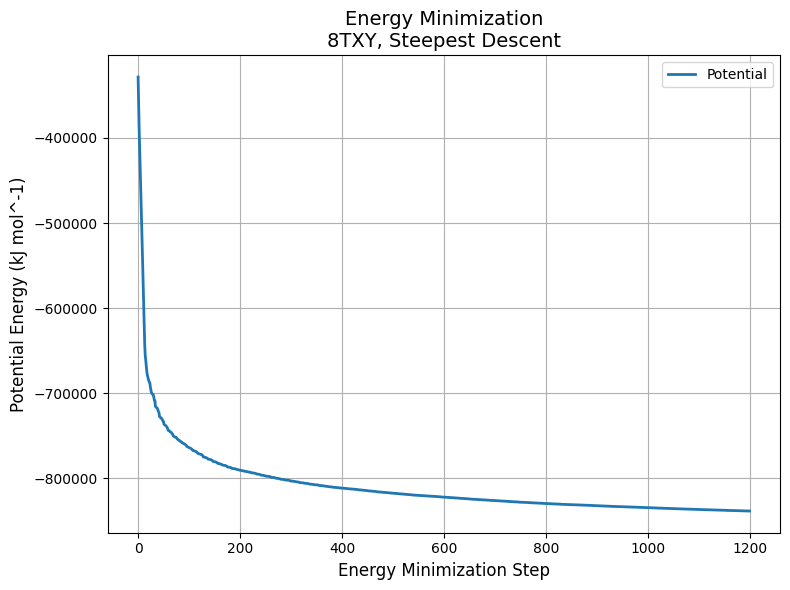

In [ ]:
!pip install matplotlib
!pip install numpy
import matplotlib.pyplot as plt
import numpy as np

# Function to read XVG files and extract data
def read_xvg(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        data = [line.strip().split() for line in lines if not (line.startswith(('#', '@')))]
    return np.array(data, dtype=float)

# Read data from the provided XVG file
data = read_xvg('/content/potential.xvg')

# Extract the steps and potential energy values
steps = data[:,0]
potential_energy = data[:,1]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(steps, potential_energy, label='Potential', linewidth=2)
plt.title('Energy Minimization\n8TXY, Steepest Descent', fontsize=14)
plt.xlabel('Energy Minimization Step', fontsize=12)
plt.ylabel('Potential Energy (kJ mol^-1)', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


#lig is grouped with the protein for the purposes of temperature coupling. In the same way, the few Cl- ions we inserted are considered part of the solvent. To do this, we need a special index group that merges the protein and lig. We accomplish this with the make_ndx module, supplying any coordinate file of the complete system. Here, I am using em.gro, the output (minimized) structure of our system:

In [ ]:
#when prompted > 1 | 13  > q
!/content/gromacs-2024.1/build/bin/gmx make_ndx -f solv_ions.pdb -o index.ndx

                     :-) GROMACS - gmx make_ndx, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx make_ndx -f solv_ions.pdb -o index.ndx


Reading structure file
Going to read 0 old index file(s)
Analysing residue names:
There are:   305    Protein residues
There are:     1      Other residues
There are: 16366      Water residues
There are:     6        Ion residues
Analysing Protein...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...

  0 System              : 54182 atoms
  1 Protein             :  5033 atoms
  2 Protein-H           :  2488 atoms
  3 C-alpha             :   305 atoms
  4 Backbone            :   915 atoms
  5 MainChain           :  1221 atoms
  6 MainChain+Cb        :  1507 atoms
  7 MainChain+H         :  1515 atoms
  8 SideChain           :  3518 atoms
  9 SideChain-H         :  1267 atoms
 10 Prot-Masses         :  5033

#Proceed with NVT equilibration

In [ ]:
!/content/gromacs-2024.1/build/bin/gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -n index.ndx -o nvt.tpr -maxwarn 5


                      :-) GROMACS - gmx grompp, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -n index.ndx -o nvt.tpr -maxwarn 5

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file nvt.mdp]:
  You have set rlist larger than the interaction cut-off, but you also have
  verlet-buffer-tolerance > 0. Will set rlist using
  verlet-buffer-tolerance.

Setting the LD random seed to -545398819

Generated 6105 of the 6105 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 6105 of the 6105 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'lig1'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bo

In [ ]:
!/content/gromacs-2024.1/build/bin/gmx mdrun -v -deffnm nvt -s nvt.tpr


                      :-) GROMACS - gmx mdrun, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx mdrun -v -deffnm nvt -s nvt.tpr

Reading file nvt.tpr, VERSION 2024.1 (single precision)
Changing nstlist from 20 to 100, rlist from 1.025 to 1.173

Update groups can not be used for this system because atoms that are (in)directly constrained together are interdispersed with other atoms

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 8 OpenMP threads 

starting mdrun 'Protein in water'
50000 steps,    100.0 ps.
step 9700: timed with pme grid 80 80 80, coulomb cutoff 1.000: 113.4 M-cycles
step 9900: timed with pme grid 64 64 64, coulom

#Visualize Temperature changes

In [ ]:
#when prompted > 16 0
!/content/gromacs-2024.1/build/bin/gmx energy -f nvt.edr -o temperature.xvg

                      :-) GROMACS - gmx energy, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx energy -f nvt.edr -o temperature.xvg

Opened nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Conserved-En.   16  Temperature   
 17  Pres.-DC        18  Pressure        19  Constr.-rmsd    20  Vir-XX        
 21  Vir-XY          22  Vir-XZ          23  Vir-YX          24  Vir-

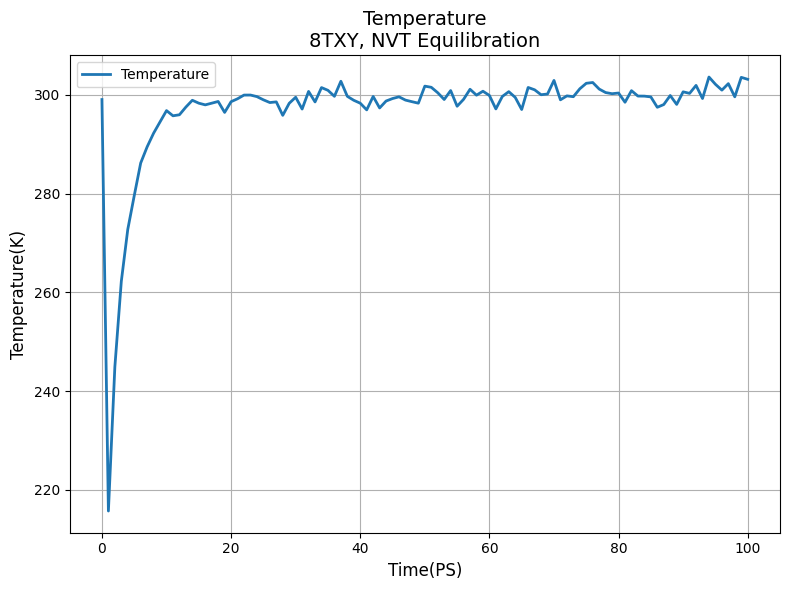

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Function to read XVG files and extract data
def read_xvg(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        data = [line.strip().split() for line in lines if not (line.startswith(('#', '@')))]
    return np.array(data, dtype=float)

# Read data from the provided XVG file
data = read_xvg('/content/temperature.xvg')

# Extract the steps and potential energy values
steps = data[:,0]
potential_energy = data[:,1]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(steps, potential_energy, label='Temperature', linewidth=2)
plt.title('Temperature\n8TXY, NVT Equilibration', fontsize=14)
plt.xlabel('Time(PS)', fontsize=12)
plt.ylabel('Temperature(K)', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


#Once the NVT simulation is complete, proceed to NPT

In [ ]:
!/content/gromacs-2024.1/build/bin/gmx grompp -f npt.mdp -c nvt.gro -t nvt.cpt -r nvt.gro -p topol.top -n index.ndx -o npt.tpr -maxwarn 5


                      :-) GROMACS - gmx grompp, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx grompp -f npt.mdp -c nvt.gro -t nvt.cpt -r nvt.gro -p topol.top -n index.ndx -o npt.tpr -maxwarn 5

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -1227098737

Generated 6105 of the 6105 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 6105 of the 6105 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'lig1'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

The center of mass of the position restraint coord's i

In [ ]:
!/content/gromacs-2024.1/build/bin/gmx mdrun -deffnm npt

                      :-) GROMACS - gmx mdrun, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx mdrun -deffnm npt

Reading file npt.tpr, VERSION 2024.1 (single precision)
Changing nstlist from 10 to 100, rlist from 1 to 1.174

Update groups can not be used for this system because atoms that are (in)directly constrained together are interdispersed with other atoms

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 8 OpenMP threads 

starting mdrun 'Protein in water'
50000 steps,    100.0 ps.

Writing final coordinates.

               Core t (s)   Wall t (s)        (%)
       Time:      248.285       31.040      799.9
              

In [ ]:
#when prompted >18 0
!/content/gromacs-2024.1/build/bin/gmx energy -f npt.edr -o pressure.xvg

                      :-) GROMACS - gmx energy, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx energy -f npt.edr -o pressure.xvg

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Conserved-En.   16  Temperature   
 17  Pres.-DC        18  Pressure        19  Constr.-rmsd    20  Box-X         
 21  Box-Y           22  Box-Z           23  Volume          24  Density

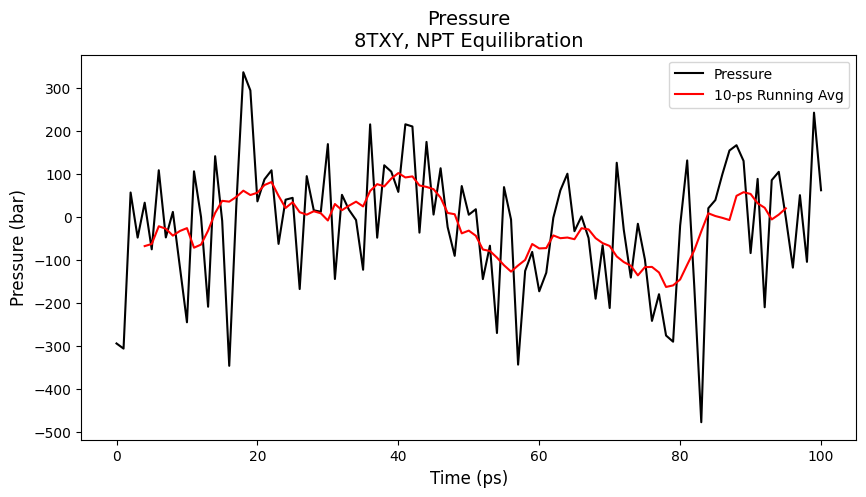

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the xvg file
# Since xvg files have header information and possibly footer information,
# we need to skip those lines. Generally, lines starting with '#' or '@' are
# comments or annotations that we need to skip.

# Initialize lists to store the data
time = []
pressure = []

# Open the file and read line by line
with open('/content/pressure.xvg', 'r') as file:
    for line in file:
        # Skip commented lines
        if line.startswith(('#', '@')):
            continue
        # Split the line into columns by whitespace
        columns = line.split()
        # Append the data to the lists, converting strings to float
        time.append(float(columns[0]))
        pressure.append(float(columns[1]))

# Convert lists to numpy arrays for efficient numerical operations
time = np.array(time)
pressure = np.array(pressure)

# Calculate the running average for smoothing the pressure data
# Here, we're assuming a 10ps window for the running average
window_size = 10 # This should be adjusted depending on the time resolution of data
running_avg_pressure = np.convolve(pressure, np.ones(window_size)/window_size, mode='valid')

# Plot the pressure and its running average
plt.figure(figsize=(10, 5))

# Plot the raw pressure data
plt.plot(time, pressure, color='black', label='Pressure')

# To plot the running average, we need to adjust the time array for the convolution operation
# The resulting array is shorter than the original time array by window_size-1 elements.
# We will plot the running average starting from the midpoint of the window to align with the peaks of the raw data.
adjusted_time = time[int(window_size/2 - 1): -int(window_size/2)]

# Plot the running average data
plt.plot(adjusted_time, running_avg_pressure, color='red', label='10-ps Running Avg')

# Add title and labels with the same style as the reference image
plt.title('Pressure\n8TXY, NPT Equilibration', fontsize=14)
plt.xlabel('Time (ps)', fontsize=12)
plt.ylabel('Pressure (bar)', fontsize=12)

# Display the legend
plt.legend()


#Visualize Density

In [ ]:
#24 0
!/content/gromacs-2024.1/build/bin/gmx energy -f npt.edr -o density.xvg

                      :-) GROMACS - gmx energy, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx energy -f npt.edr -o density.xvg

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Conserved-En.   16  Temperature   
 17  Pres.-DC        18  Pressure        19  Constr.-rmsd    20  Box-X         
 21  Box-Y           22  Box-Z           23  Volume          24  Density 

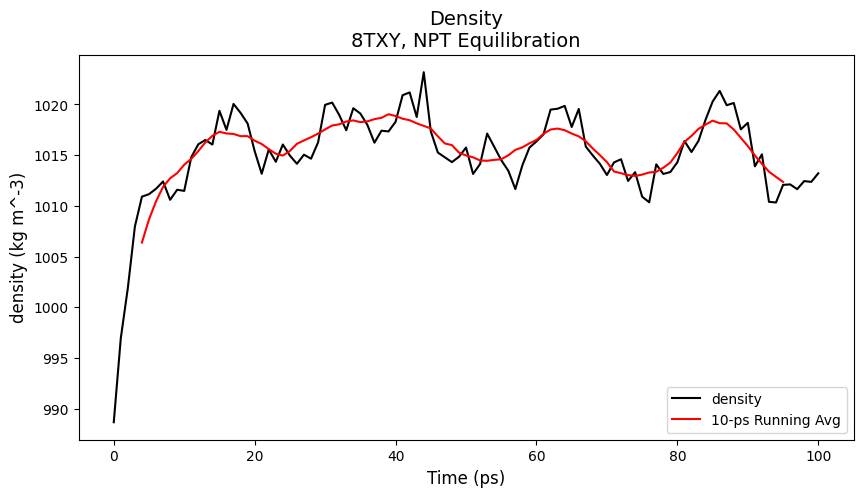

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the xvg file
# Since xvg files have header information and possibly footer information,
# we need to skip those lines. Generally, lines starting with '#' or '@' are
# comments or annotations that we need to skip.

# Initialize lists to store the data
time = []
density = []

# Open the file and read line by line
with open('/content/density.xvg', 'r') as file:
    for line in file:
        # Skip commented lines
        if line.startswith(('#', '@')):
            continue
        # Split the line into columns by whitespace
        columns = line.split()
        # Append the data to the lists, converting strings to float
        time.append(float(columns[0]))
        density.append(float(columns[1]))

# Convert lists to numpy arrays for efficient numerical operations
time = np.array(time)
density = np.array(density)

# Calculate the running average for smoothing the pressure data
# Here, we're assuming a 10ps window for the running average
window_size = 10 # This should be adjusted depending on the time resolution of data
running_avg_density = np.convolve(density, np.ones(window_size)/window_size, mode='valid')

# Plot the pressure and its running average
plt.figure(figsize=(10, 5))

# Plot the raw pressure data
plt.plot(time, density, color='black', label='density')

# To plot the running average, we need to adjust the time array for the convolution operation
# The resulting array is shorter than the original time array by window_size-1 elements.
# We will plot the running average starting from the midpoint of the window to align with the peaks of the raw data.
adjusted_time = time[int(window_size/2 - 1): -int(window_size/2)]

# Plot the running average data
plt.plot(adjusted_time, running_avg_density, color='red', label='10-ps Running Avg')

# Add title and labels with the same style as the reference image
plt.title('Density\n8TXY, NPT Equilibration', fontsize=14)
plt.xlabel('Time (ps)', fontsize=12)
plt.ylabel('density (kg m^-3)', fontsize=12)

# Display the legend
plt.legend()


#Upon completion of the two equilibration phases, the system is now well-equilibrated at the desired temperature and pressure. We are now ready to release the position restraints and run production MD for data collection.

In [ ]:
!/content/gromacs-2024.1/build/bin/gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -n index.ndx -maxwarn 5 -o md_0_10.tpr


                      :-) GROMACS - gmx grompp, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -n index.ndx -maxwarn 5 -o md_0_10.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to 2138044927

Generated 6105 of the 6105 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 6105 of the 6105 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'lig1'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...
Number of degrees of freedom in T-Coupling group Protein_lig1 is

In [ ]:
# Run using GPU
!/content/gromacs-2024.1/build/bin/gmx mdrun -v -deffnm md_0_10 -s md_0_10.tpr -nb gpu


                      :-) GROMACS - gmx mdrun, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx mdrun -v -deffnm md_0_10 -s md_0_10.tpr -nb gpu

Reading file md_0_10.tpr, VERSION 2024.1 (single precision)
Changing nstlist from 20 to 100, rlist from 1.221 to 1.348

Update groups can not be used for this system because atoms that are (in)directly constrained together are interdispersed with other atoms

1 GPU selected for this run.
Mapping of GPU IDs to the 2 GPU tasks in the 1 rank on this node:
  PP:0,PME:0
PP tasks will do (non-perturbed) short-ranged interactions on the GPU
PP task will update and constrain coordinates on the GPU
PME tasks will do all aspects on the GPU
Using 1 MPI thread
Using 8 OpenMP threads 

starting mdrun 'Protein in water'
5000000 steps,  10000.0 ps.
step 7600: timed with pme grid 60 60 60, coulomb cutoff 1.200: 147.9 M-cycles
step 7800: timed with pme

#Center the system
Select group for centering
Select a group: > 1

Selected 1: 'Protein'

Select group for output
Select a group: > 0

Selected 0: 'System'

In [ ]:
!/content/gromacs-2024.1/build/bin/gmx trjconv -s md_0_10.tpr -f md_0_10.xtc -o md_center.trr -center -pbc mol -ur compact

                     :-) GROMACS - gmx trjconv, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx trjconv -s md_0_10.tpr -f md_0_10.xtc -o md_center.trr -center -pbc mol -ur compact

Note that major changes are planned in future for trjconv, to improve usability and utility.
Will write trr: Trajectory in portable xdr format
Reading file md_0_10.tpr, VERSION 2024.1 (single precision)
Reading file md_0_10.tpr, VERSION 2024.1 (single precision)
Select group for centering
Group     0 (         System) has 54182 elements
Group     1 (        Protein) has  5033 elements
Group     2 (      Protein-H) has  2488 elements
Group     3 (        C-alpha) has   305 elements
Group     4 (       Backbone) has   915 elements
Group     5 (      MainChain) has  1221 elements
Group     6 (   MainChain+Cb) has  1507 elements
Group     7 (    MainChain+H) has  1515 elements
Group     8 (      SideCha

#Access the first frame
Select a group: > 0

Selected 0: 'System'

In [ ]:
!/content/gromacs-2024.1/build/bin/gmx trjconv -s md_0_10.tpr -f md_center.trr -o start.pdb -dump 0

                     :-) GROMACS - gmx trjconv, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx trjconv -s md_0_10.tpr -f md_center.trr -o start.pdb -dump 0

Note that major changes are planned in future for trjconv, to improve usability and utility.
Will write pdb: Protein data bank file
Reading file md_0_10.tpr, VERSION 2024.1 (single precision)
Reading file md_0_10.tpr, VERSION 2024.1 (single precision)
Select group for output
Group     0 (         System) has 54182 elements
Group     1 (        Protein) has  5033 elements
Group     2 (      Protein-H) has  2488 elements
Group     3 (        C-alpha) has   305 elements
Group     4 (       Backbone) has   915 elements
Group     5 (      MainChain) has  1221 elements
Group     6 (   MainChain+Cb) has  1507 elements
Group     7 (    MainChain+H) has  1515 elements
Group     8 (      SideChain) has  3518 elements
Group     9 ( 

#Analysis step

In [ ]:
#Upload to drive
!mkdir -p /content/my_colab_files
!find /content -maxdepth 1 -type f -exec cp {} /content/my_colab_files/ \;
!cp -r /content/my_colab_files "/content/drive/My Drive/lig1_pose5/"


In [ ]:
!conda install -c conda-forge mdtraj


Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mdtraj


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.3.0               |  py312h7900ff3_0         1.1 MB  conda-forge
    libexpat-2.5.0             |       hcb278e6_1          76 KB  conda-forge
    mdtraj-1.9.9               |  py312hadb1fa1_1         1.5 MB  conda-forge
    numexpr-2.9.0              |py312hed3a10b_100         153 KB  conda-forge
    numpy-1.26.4               |  py312heda63a1_0         7.1 MB  conda-forge
    pandas-2.2.2               |  py312hfb8ada1_0        14.7 MB  conda-forge
    pytables-3.9.2             |  py312h96d95ec_2         1.5 MB  conda-forge
    python-3.12.2              |hab00c5b_0_cpython        30.8 MB  conda-forge
    python_abi-3.12            |          4_cp312   

In [ ]:
!pip install mdtraj


  Using cached mdtraj-1.9.9-cp312-cp312-linux_x86_64.whl


In [ ]:
import mdtraj as md


(5033, lig1364-N)
(5034, lig1364-N)
(5035, lig1364-N)
(5036, lig1364-N)
(5037, lig1364-N)
(5057, lig1364-O)
(5058, lig1364-O)
(942, MET104-N)
(943, MET104-H)
(944, MET104-CA)
(945, MET104-HA)
(946, MET104-CB)
(947, MET104-HB3)
(948, MET104-HB2)
(949, MET104-CG)
(950, MET104-HG3)
(951, MET104-HG2)
(952, MET104-SD)
(953, MET104-CE)
(954, MET104-HE1)
(955, MET104-HE2)
(956, MET104-HE3)
(957, MET104-C)
(958, MET104-O)
(34295, HOH104-O)
(34296, HOH104-H1)
(34297, HOH104-H2)


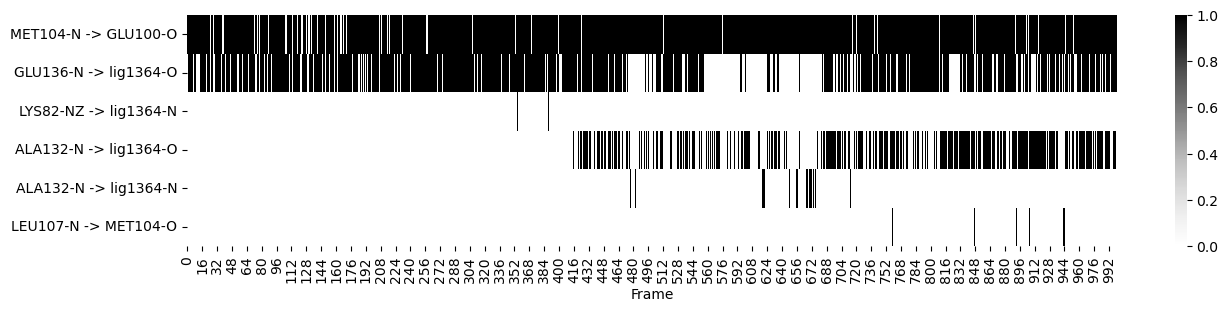

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import mdtraj as md
import numpy as np
from collections import defaultdict

trj = md.load('md_center.trr', top='start.pdb')
protein_ha_index = trj.topology.select("protein and (not type H)")
ligand_ha_index = trj.topology.select("resname lig1 and (not type H)") #resname is the name of your ligand
complex_ha_index = np.concatenate((protein_ha_index, ligand_ha_index))
potential_hbond_atoms = np.concatenate([trj.topology.select("resname lig1 and (type N or type O)"), trj.topology.select("(residue 104)"),]) #try different residue numbers
print(*zip(potential_hbond_atoms, map(trj.topology.atom, potential_hbond_atoms)),sep="\n",)
hbonds = md.wernet_nilsson(trj)

def linear_zeros_factory(n):
    def zeros():
        return np.zeros(n)
    return zeros

lig_hbonds = defaultdict(linear_zeros_factory(len(hbonds)))

for frame_no, frame_hbonds in enumerate(hbonds):
    for atom in potential_hbond_atoms:
        bond_idx, _ = np.where(frame_hbonds == atom)
        for bond_id in bond_idx:
            hbd, _, hba = map(trj.topology.atom, frame_hbonds[bond_id])
            bond_name = f"{hbd} -> {hba}"
            lig_hbonds[bond_name][frame_no] = 1

hbdf = pd.DataFrame.from_dict(lig_hbonds)
hbdf.to_csv('104.csv') #change to the appropriate name

fig, ax = plt.subplots(figsize=(15,3))
sns.heatmap(hbdf.T, cmap="Greys", ax=ax)
ax.set_xlabel("Frame")
fig.savefig('104.png') #change to the appropriate name

(5033, lig1364-N)
(5034, lig1364-N)
(5035, lig1364-N)
(5036, lig1364-N)
(5037, lig1364-N)
(5057, lig1364-O)
(5058, lig1364-O)
(34595, HOH204-O)
(34596, HOH204-H1)
(34597, HOH204-H2)


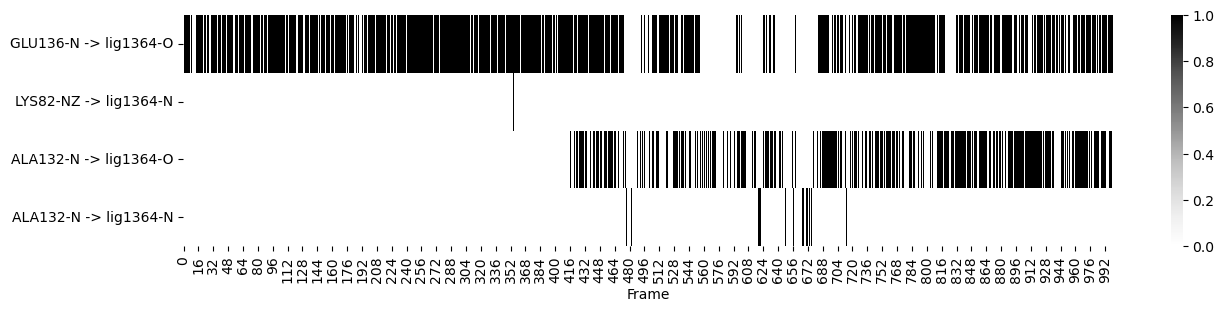

In [ ]:
potential_hbond_atoms = np.concatenate([trj.topology.select("resname lig1 and (type N or type O)"), trj.topology.select("(residue 204)"),])
print(*zip(potential_hbond_atoms, map(trj.topology.atom, potential_hbond_atoms)),sep="\n",)
hbonds = md.wernet_nilsson(trj)

lig_hbonds = defaultdict(linear_zeros_factory(len(hbonds)))

for frame_no, frame_hbonds in enumerate(hbonds):
    for atom in potential_hbond_atoms:
        bond_idx, _ = np.where(frame_hbonds == atom)
        for bond_id in bond_idx:
            hbd, _, hba = map(trj.topology.atom, frame_hbonds[bond_id])
            bond_name = f"{hbd} -> {hba}"
            lig_hbonds[bond_name][frame_no] = 1

hbdf = pd.DataFrame.from_dict(lig_hbonds)
hbdf.to_csv('204_lig.csv')

fig, ax = plt.subplots(figsize=(15,3))
sns.heatmap(hbdf.T, cmap="Greys", ax=ax)
ax.set_xlabel("Frame")
fig.savefig('lig_204.png')

(5033, lig1364-N)
(5034, lig1364-N)
(5035, lig1364-N)
(5036, lig1364-N)
(5037, lig1364-N)
(5057, lig1364-O)
(5058, lig1364-O)
(1205, ILE119-N)
(1206, ILE119-H)
(1207, ILE119-CA)
(1208, ILE119-HA)
(1209, ILE119-CB)
(1210, ILE119-HB)
(1211, ILE119-CG2)
(1212, ILE119-HG21)
(1213, ILE119-HG22)
(1214, ILE119-HG23)
(1215, ILE119-CG1)
(1216, ILE119-HG13)
(1217, ILE119-HG12)
(1218, ILE119-CD1)
(1219, ILE119-HD11)
(1220, ILE119-HD12)
(1221, ILE119-HD13)
(1222, ILE119-C)
(1223, ILE119-O)
(34340, HOH119-O)
(34341, HOH119-H1)
(34342, HOH119-H2)


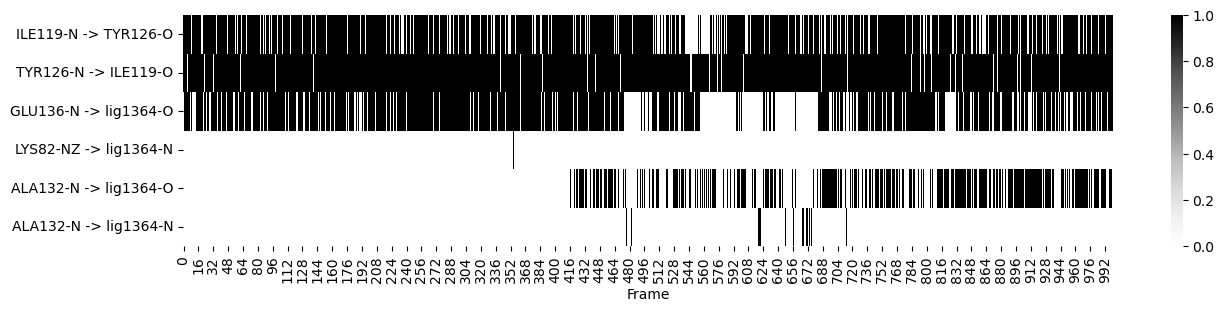

In [ ]:
potential_hbond_atoms = np.concatenate([trj.topology.select("resname lig1 and (type N or type O)"), trj.topology.select("(residue 119)"),])
print(*zip(potential_hbond_atoms, map(trj.topology.atom, potential_hbond_atoms)),sep="\n",)

lig_hbonds = defaultdict(linear_zeros_factory(len(hbonds)))

for frame_no, frame_hbonds in enumerate(hbonds):
    for atom in potential_hbond_atoms:
        bond_idx, _ = np.where(frame_hbonds == atom)
        for bond_id in bond_idx:
            hbd, _, hba = map(trj.topology.atom, frame_hbonds[bond_id])
            bond_name = f"{hbd} -> {hba}"
            lig_hbonds[bond_name][frame_no] = 1

hbdf = pd.DataFrame.from_dict(lig_hbonds)
hbdf.to_csv('119_lig.csv')

fig, ax = plt.subplots(figsize=(15,3))
sns.heatmap(hbdf.T, cmap="Greys", ax=ax)
ax.set_xlabel("Frame")
fig.savefig('lig_119.png')

(5033, lig1364-N)
(5034, lig1364-N)
(5035, lig1364-N)
(5036, lig1364-N)
(5037, lig1364-N)
(5057, lig1364-O)
(5058, lig1364-O)
(1224, GLU120-N)
(1225, GLU120-H)
(1226, GLU120-CA)
(1227, GLU120-HA)
(1228, GLU120-CB)
(1229, GLU120-HB3)
(1230, GLU120-HB2)
(1231, GLU120-CG)
(1232, GLU120-HG3)
(1233, GLU120-HG2)
(1234, GLU120-CD)
(1235, GLU120-OE1)
(1236, GLU120-OE2)
(1237, GLU120-C)
(1238, GLU120-O)
(34343, HOH120-O)
(34344, HOH120-H1)
(34345, HOH120-H2)


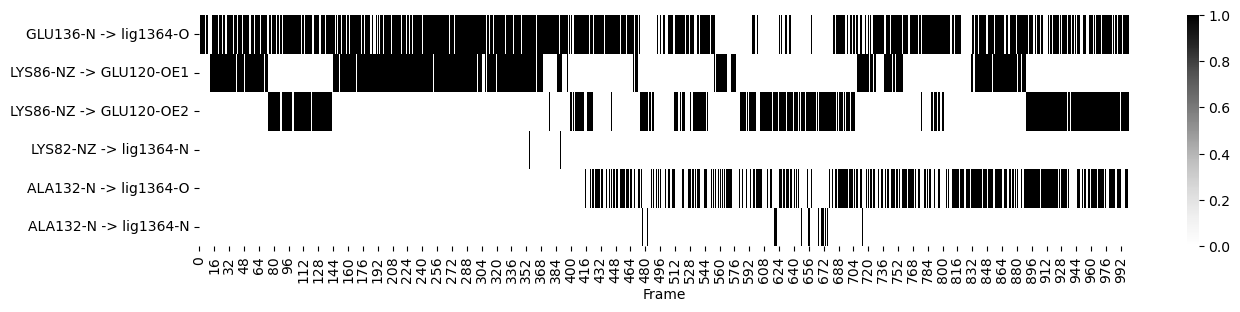

In [ ]:
potential_hbond_atoms = np.concatenate([trj.topology.select("resname lig1 and (type N or type O)"), trj.topology.select("(residue 120)"),])
print(*zip(potential_hbond_atoms, map(trj.topology.atom, potential_hbond_atoms)),sep="\n",)

lig_hbonds = defaultdict(linear_zeros_factory(len(hbonds)))

for frame_no, frame_hbonds in enumerate(hbonds):
    for atom in potential_hbond_atoms:
        bond_idx, _ = np.where(frame_hbonds == atom)
        for bond_id in bond_idx:
            hbd, _, hba = map(trj.topology.atom, frame_hbonds[bond_id])
            bond_name = f"{hbd} -> {hba}"
            lig_hbonds[bond_name][frame_no] = 1

hbdf = pd.DataFrame.from_dict(lig_hbonds)
hbdf.to_csv('120_lig.csv')

fig, ax = plt.subplots(figsize=(15,3))
sns.heatmap(hbdf.T, cmap="Greys", ax=ax)
ax.set_xlabel("Frame")
fig.savefig('lig_120.png')

(5033, lig1364-N)
(5034, lig1364-N)
(5035, lig1364-N)
(5036, lig1364-N)
(5037, lig1364-N)
(5057, lig1364-O)
(5058, lig1364-O)
(899, ARG102-N)
(900, ARG102-H)
(901, ARG102-CA)
(902, ARG102-HA)
(903, ARG102-CB)
(904, ARG102-HB3)
(905, ARG102-HB2)
(906, ARG102-CG)
(907, ARG102-HG3)
(908, ARG102-HG2)
(909, ARG102-CD)
(910, ARG102-HD3)
(911, ARG102-HD2)
(912, ARG102-NE)
(913, ARG102-HE)
(914, ARG102-CZ)
(915, ARG102-NH1)
(916, ARG102-HH11)
(917, ARG102-HH12)
(918, ARG102-NH2)
(919, ARG102-HH21)
(920, ARG102-HH22)
(921, ARG102-C)
(922, ARG102-O)
(34289, HOH102-O)
(34290, HOH102-H1)
(34291, HOH102-H2)


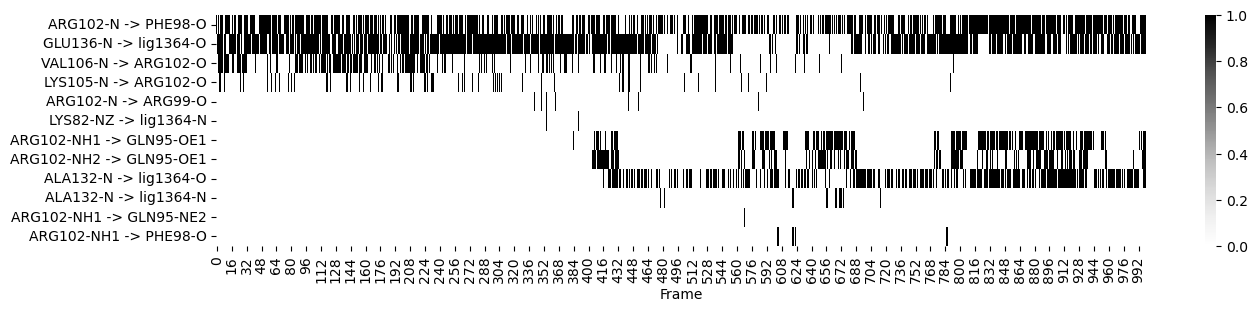

In [ ]:
potential_hbond_atoms = np.concatenate([trj.topology.select("resname lig1 and (type N or type O)"), trj.topology.select("(residue 102)"),])
print(*zip(potential_hbond_atoms, map(trj.topology.atom, potential_hbond_atoms)),sep="\n",)

lig_hbonds = defaultdict(linear_zeros_factory(len(hbonds)))

for frame_no, frame_hbonds in enumerate(hbonds):
    for atom in potential_hbond_atoms:
        bond_idx, _ = np.where(frame_hbonds == atom)
        for bond_id in bond_idx:
            hbd, _, hba = map(trj.topology.atom, frame_hbonds[bond_id])
            bond_name = f"{hbd} -> {hba}"
            lig_hbonds[bond_name][frame_no] = 1

hbdf = pd.DataFrame.from_dict(lig_hbonds)
hbdf.to_csv('102_lig.csv')

fig, ax = plt.subplots(figsize=(15,3))
sns.heatmap(hbdf.T, cmap="Greys", ax=ax)
ax.set_xlabel("Frame")
fig.savefig('lig_102.png')

#quantifying how much the ligand binding pose has changed over the course of the simulation. To compute a heavy-atom RMSD of just lig, create a new index group for it:
 ## > 13 & ! a H*
 ## > name 26 lig_Heavy
 ## > q

In [ ]:
!/content/gromacs-2024.1/build/bin/gmx make_ndx -f em.gro -n index.ndx

                     :-) GROMACS - gmx make_ndx, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx make_ndx -f em.gro -n index.ndx


Reading structure file
Going to read 1 old index file(s)

  0 System              : 54182 atoms
  1 Protein             :  5033 atoms
  2 Protein-H           :  2488 atoms
  3 C-alpha             :   305 atoms
  4 Backbone            :   915 atoms
  5 MainChain           :  1221 atoms
  6 MainChain+Cb        :  1507 atoms
  7 MainChain+H         :  1515 atoms
  8 SideChain           :  3518 atoms
  9 SideChain-H         :  1267 atoms
 10 Prot-Masses         :  5033 atoms
 11 non-Protein         : 49149 atoms
 12 Other               :    45 atoms
 13 lig1                :    45 atoms
 14 CL                  :     6 atoms
 15 Water               : 49098 atoms
 16 SOL                 : 49098 atoms
 17 non-Water           :  5084 atoms
 18 Ion         

#Execute the rms module, choosing  4 "Backbone" for least-squares fitting and 21 "lig1_Heavy" for the RMSD calculation. By doing so, the overall rotation and translation of the protein is removed via fitting and the RMSD reported is how much the lig position has varied relative to the protein, which is a good indicator of how well the binding pose was preserved during the simulation.



In [ ]:
!/content/gromacs-2024.1/build/bin/gmx rms -s em.tpr -f md_center.trr -n index.ndx -tu ns -o rmsd_lig1.xvg


                       :-) GROMACS - gmx rms, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx rms -s em.tpr -f md_center.trr -n index.ndx -tu ns -o rmsd_lig1.xvg

Reading file em.tpr, VERSION 2024.1 (single precision)
Reading file em.tpr, VERSION 2024.1 (single precision)
Select group for least squares fit
Group     0 (         System) has 54182 elements
Group     1 (        Protein) has  5033 elements
Group     2 (      Protein-H) has  2488 elements
Group     3 (        C-alpha) has   305 elements
Group     4 (       Backbone) has   915 elements
Group     5 (      MainChain) has  1221 elements
Group     6 (   MainChain+Cb) has  1507 elements
Group     7 (    MainChain+H) has  1515 elements
Group     8 (      SideChain) has  3518 elements
Group     9 (    SideChain-H) has  1267 elements
Group    10 (    Prot-Masses) has  5033 elements
Group    11 (    non-Protein) has 49149 el

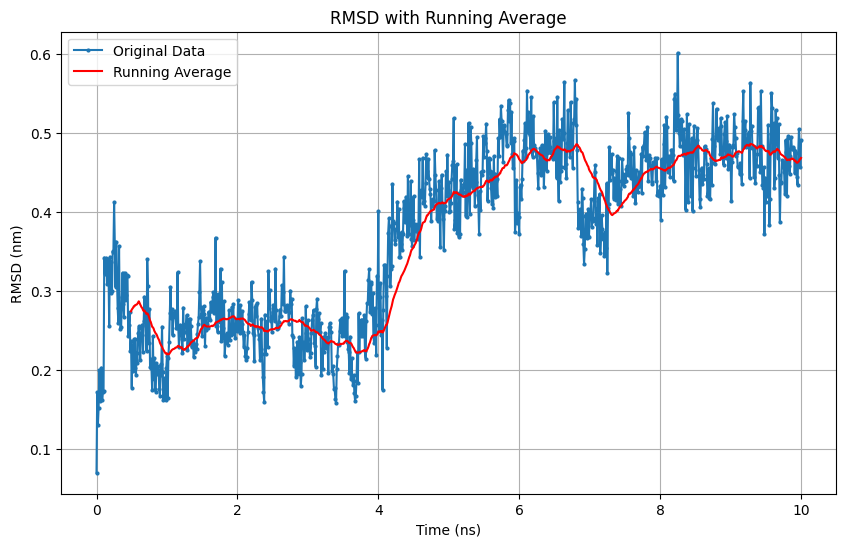

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the running average
def running_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

rmsd_file_path = 'rmsd_lig1.xvg'
# Lists to store the X and Y data
x_rmsd = []
y_rmsd = []

# Open the file and read the data, ignoring lines that start with '@' or '#'
with open(rmsd_file_path, 'r') as file:
    for line in file:
        if line.startswith(('@', '#')):
            continue
        columns = line.split()
        if len(columns) >= 2:
            x_rmsd.append(float(columns[0]))
            y_rmsd.append(float(columns[1]))

# Calculate the running average of the Y data
window_size_rmsd = 50  # Adjust this value to modify smoothness
y_rmsd_avg = running_average(y_rmsd, window_size_rmsd)

# Adjust the x_rmsd for plotting the running average to match the size of y_rmsd_avg
adjusted_x_rmsd = x_rmsd[len(x_rmsd) - len(y_rmsd_avg):]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(x_rmsd, y_rmsd, marker='o', linestyle='-', markersize=2, label='Original Data')
plt.plot(adjusted_x_rmsd, y_rmsd_avg, linestyle='-', color='red', label='Running Average')
plt.title('RMSD with Running Average')
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (nm)')
plt.legend()
plt.grid(True)
plt.show()


#Protein-Ligand Interaction Energy
To quantify the strength of the interaction between lig and protein, it may be useful to compute the nonbonded interaction energy between these two species. GROMACS has the ability to decompose the short-range nonbonded energies between any number of defined groups.

It is important to note that this quantity is NOT a free energy or a binding energy. In fact, most force fields are not parametrized in such a way that this quantity is actually physically meaningful.

it will output The average short-range Coulombic interaction energy and the short-range Lennard-Jones energy

 There is no way to experimentally verify these quantities, so it is impossible to know whether they are meaningful. The total interaction energy, however, is useful in this case.

In [ ]:
!/content/gromacs-2024.1/build/bin/gmx grompp -f ie.mdp -c npt.gro -t npt.cpt -p topol.top -n index.ndx -o ie.tpr


                      :-) GROMACS - gmx grompp, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx grompp -f ie.mdp -c npt.gro -t npt.cpt -p topol.top -n index.ndx -o ie.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -176685092

Generated 6105 of the 6105 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 6105 of the 6105 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'lig1'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...
Number of degrees of freedom in T-Coupling group Protein_lig1 is 12669.66
Number

In [ ]:
!/content/gromacs-2024.1/build/bin/gmx mdrun -deffnm ie -rerun md_0_10.xtc -nb cpu


                      :-) GROMACS - gmx mdrun, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx mdrun -deffnm ie -rerun md_0_10.xtc -nb cpu

Reading file ie.tpr, VERSION 2024.1 (single precision)

Changing nstlist from 10 to 50, rlist from 1 to 1.105


Update groups can not be used for this system because atoms that are (in)directly constrained together are interdispersed with other atoms

Using 1 MPI thread
Using 16 OpenMP threads 

starting md rerun 'Protein in water', reading coordinates from input trajectory 'md_0_10.xtc'

Last frame       1000 time 10000.000   

NOTE: 25 % of the run time was spent in domain decomposition,
      32 % of the run time was spent in pair search,
      you might want to increase nstlist (this has no effect on accuracy)

               Core t (s)   Wall t (s)        (%)
       Time:      769.044       48.065     1600.0
                 (ns/day) 

In [ ]:
#when prompted choose > 20 > 21 > q
!/content/gromacs-2024.1/build/bin/gmx energy -f ie.edr -o interaction_energy.xvg

                      :-) GROMACS - gmx energy, 2024.1 (-:

Executable:   /content/gromacs-2024.1/build/bin/gmx
Data prefix:  /content/gromacs-2024.1 (source tree)
Working dir:  /content
Command line:
  gmx energy -f ie.edr -o interaction_energy.xvg

Opened ie.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Potential       12  Box-X         
 13  Box-Y           14  Box-Z           15  Volume          16  Density       
 17  Coul-SR:Protein-Protein             18  LJ-SR:Protein-Protein             
 19  Coul-14:Protein-Protein             20  LJ-14:Protein-Prote

In [ ]:
# Average energies
lj_14_protein_protein = 4860.06  # kJ/mol
coul_sr_protein_lig1 = -78.0774  # kJ/mol

# Calculate the total interaction energy
total_interaction_energy = lj_14_protein_protein + coul_sr_protein_lig1
total_interaction_energy


4781.9826

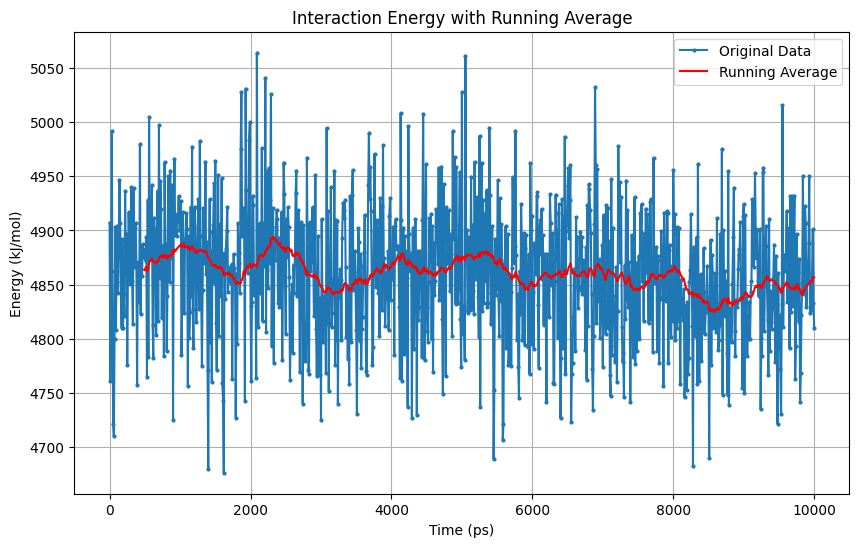

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Path to the XVG file
file_path = 'interaction_energy.xvg'

# Function to calculate the running average
def running_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Lists to store the X and Y data
x_data = []
y_data = []

# Open the file and read the data, ignoring lines that start with '@' or '#'
with open(file_path, 'r') as file:
    for line in file:
        if line.startswith(('@', '#')):
            continue
        columns = line.split()
        if len(columns) >= 2:
            x_data.append(float(columns[0]))
            y_data.append(float(columns[1]))

# Calculate the running average of the Y data
window_size = 50  # Change this value to adjust the smoothness
y_avg = running_average(y_data, window_size)

# Adjust the x_data for plotting the running average to match the size of y_avg
adjusted_x_data = x_data[len(x_data) - len(y_avg):]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, marker='o', linestyle='-', markersize=2, label='Original Data')
plt.plot(adjusted_x_data, y_avg, linestyle='-', color='red', label='Running Average')
plt.title('Interaction Energy with Running Average')
plt.xlabel('Time (ps)')
plt.ylabel('Energy (kJ/mol)')
plt.legend()
plt.grid(True)
plt.show()
